In [13]:
import json

with open("./label.json") as f:
    targets = json.load(f)


In [28]:
(targets["2019-10-30 01.59.42"]["targets"][0]["segments"][0])

[2965.250965250974, 43546.193050193055]

In [27]:
(targets["2019-10-30 01.59.42"]["targets"][0]["labels"][0]["label"])

225

In [14]:
targets["2019-10-30 01.59.42"]['project']

10

In [19]:
slide_names = targets.keys()
print(slide_names)

dict_keys(['2019-10-30 01.59.42', '2019-10-30 02.01.19', '2019-10-30 02.02.21', '2019-10-30 02.03.40', '2019-10-30 02.05.46', '2019-10-30 02.04.50', '2019-10-30 02.09.05', '2019-10-30 02.07.27', '2019-10-30 02.10.47', '2019-10-30 02.13.08', '2019-10-30 02.14.37', '2019-10-30 02.18.03', '2019-10-30 02.19.24', '2019-10-30 02.15.32', '2019-10-30 02.23.07', '350013D01170 - 2019-10-30 02.21.40'])


In [37]:
def label_histogram(js):
    ret = dict()
    len_list = []
    slide_names = js.keys()
    for slide_name in slide_names:
        segments = (js[slide_name]["targets"])
        for segment in segments:
            if len(segment["labels"]) == 0:
                continue
            label = segment["labels"][0]["label"]
            segment_list = segment["segments"]
            len_list.append(len(segment_list))
            if label in ret.keys():
                ret[label] += 1
            else:
                ret[label] = 0
    return ret, len_list

{225: 127, 220: 20, 80: 26, 56: 210, 43: 186, 53: 187, 45: 264, 42: 408, 54: 250, 41: 547, 55: 100, 202: 41, 226: 53, 44: 11}
[0 4 8 ... 0 0 1]


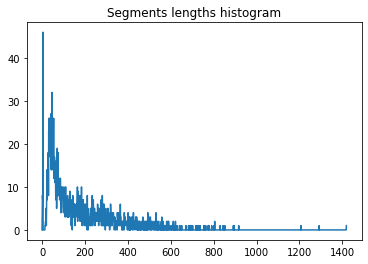

0
46


In [52]:
import numpy as np
import matplotlib.pyplot as plt

hist, len_list = label_histogram(targets)
print(hist)
len_hist, bins = np.histogram(len_list, np.arange(max(len_list)+1))
print(len_hist)

plt.plot(bins[:-1], len_hist)
plt.title("Segments lengths histogram")
plt.show()
print(len_hist[])
print(len_hist[4])

In [60]:
def visualize_int(js, integer):
    slide_names = js.keys()
    for slide_name in slide_names:
        segments = (js[slide_name]["targets"])
        for segment in segments:
            if len(segment["labels"]) == 0:
                continue
            label = segment["labels"][0]["label"]
            if label == integer:
                return slide_name, segment["segments"]
    return None, None

sample = {}

for integer in hist.keys():
    name, seg = visualize_int(targets, integer)
    if name is not None and seg is not None:
        sample[integer] = (name, np.array(seg))
    else:
        print(f"Integer {integer} Not Found!")

Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 134400 , Height: 52992
Width: 165120 , Height: 27648
Width: 161280 , Height: 59904
Width: 161280 , Height: 55296
Width: 172800 , Height: 73728


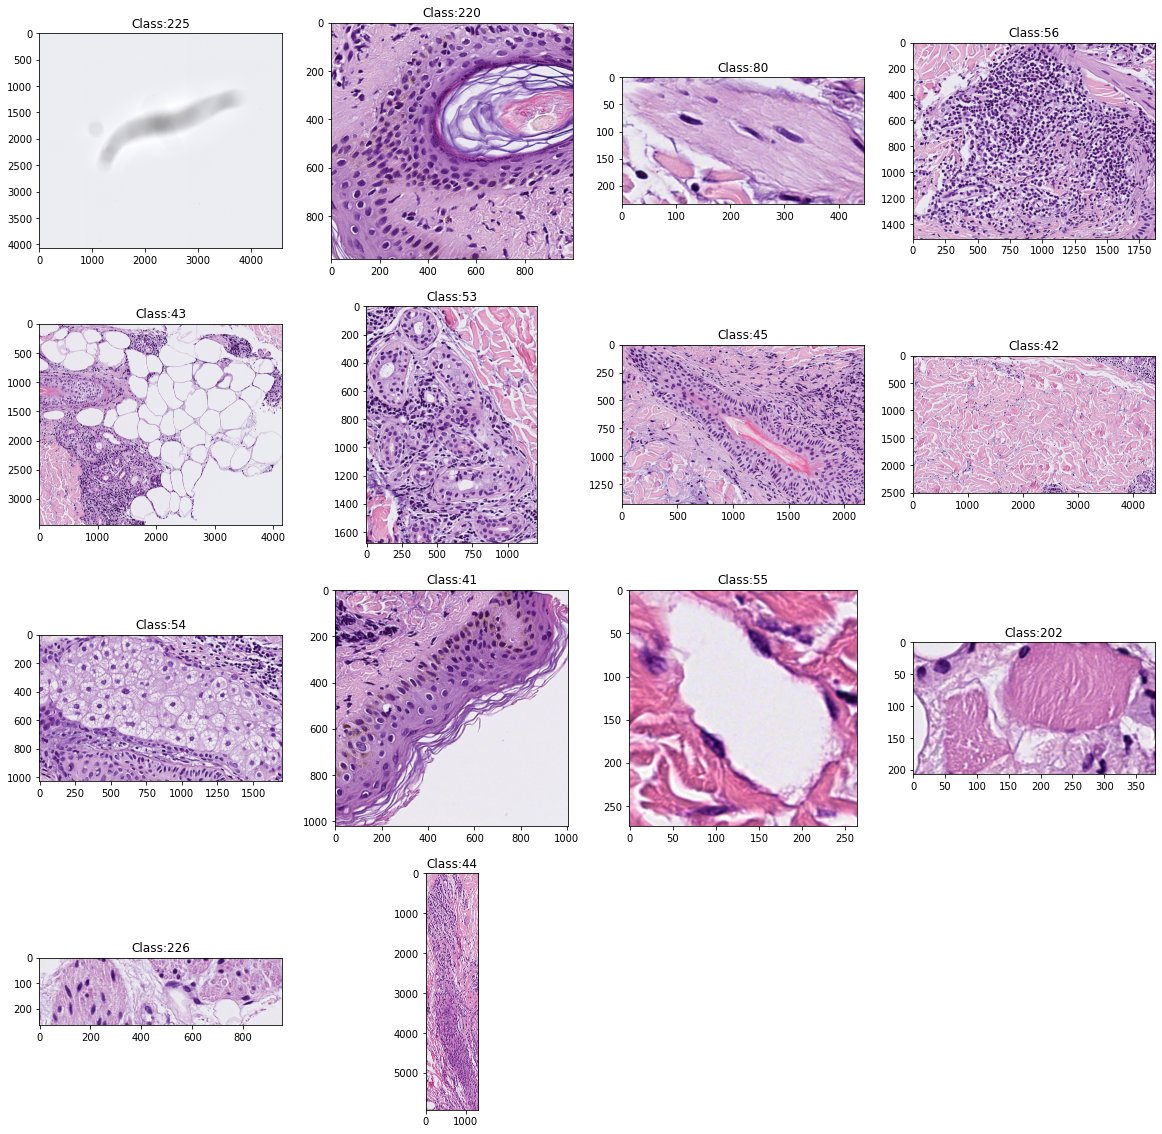

In [61]:
from hephaestus.data.ndpwrapper_v2 import Slide_ndpread
import os

fig1 = plt.figure(figsize=(20, 20))

ndpi_dir = "/mnt/cephrbd/data/A19001_NCKU_SKIN/Image/20191106/"

for i, integer in enumerate(sample.keys()):
    name, seg = sample[integer]
    this_slide = Slide_ndpread(os.path.join(ndpi_dir, name+".ndpi"))
    cx, cy = int(np.min(seg[:, 0])),int(np.min(seg[:, 1]))
    ww, hh = int(np.max(seg[:, 0]))-cx, int(np.max(seg[:, 1]))-cy
    this_patch = this_slide.get_patch_at_level((cx, cy), (ww, hh))
    ax = fig1.add_subplot(4, 4, i+1)
    ax.imshow(this_patch)
    ax.set_title(f"Class:{integer}")

plt.show()

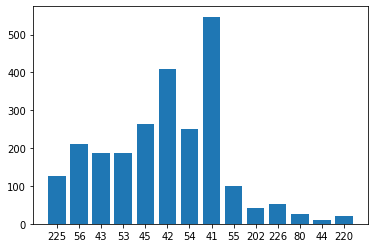

In [67]:
class_map = [
    (225,0), # "background"
    (56, 1), # "inflammatory infiltration"
    (43, 2), # "adipose tissue"
    (53, 3), # "sweat gland"
    (45, 4), # "hair follicles" 
    (42, 5), # "dermis"
    (54, 6), # "sebaceous gland"
    (41, 7), # "epidermis"
    (55, 8), # "blood vessels"
    (202,9), # "skeletal muscle"
    (226,10),# "nerve fiber"
    (80, 11),# "smooth muscle"
    (44, 12),# "unspecified"
    (220,13),# "ROI"   
]

int_to_class = [225, 56, 43, 53, 45, 42, 54, 41, 55, 202, 226, 80, 44, 220]
plt.bar(np.arange(len(int_to_class)), [hist[i] for i in int_to_class], tick_label=[i for i, j in class_map])
plt.show()